In [102]:
DELTA_LAKE_TABLE = "loans.delta"

In [103]:
from deltalake import DeltaTable
dt = DeltaTable(DELTA_LAKE_TABLE)
dt.load_version(1)
print(dt.version())

1


In [93]:
df_clean = df
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_clean['term'] = label.fit_transform(df_clean['term'])
df_clean['grade'] = label.fit_transform(df_clean['grade'])
df_clean['int_rate'] = label.fit_transform(df_clean['int_rate'])
df_clean['verification_status'] = label.fit_transform(df_clean['verification_status'])

In [94]:
x = df_clean.drop(['loan_status'], axis=1)
y = df_clean['loan_status']

In [95]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np 

coltrans = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,3,5])],      # 0,3,5 refers to the column indexes that need to be transformed      
    remainder = 'passthrough'                               
)                                                         

x = np.array(coltrans.fit_transform(x))

In [96]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(
    x,
    y,
    test_size = .2
)

In [97]:
print(ytr.value_counts())
print(yts.value_counts())

1    26343
0     4518
Name: loan_status, dtype: int64
1    6607
0    1109
Name: loan_status, dtype: int64


In [98]:
xtr_2 = xtr
ytr_2 = ytr

In [99]:
from sklearn.ensemble import RandomForestClassifier
import time

start = time.time()

model = RandomForestClassifier()
model.fit(xtr_2, ytr_2)

stop = time.time()
duration = stop-start
print('The training took {:.2f} seconds.'.format(duration))

The training took 6.59 seconds.


In [106]:
print("Accuracy =>", round(model.score(xts, yts) * 100, 2), '%')

Accuracy => 85.15 %


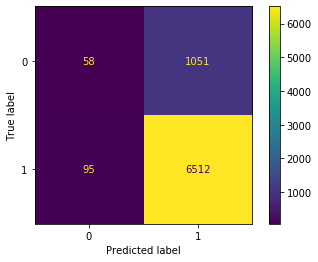

              precision    recall  f1-score   support

    Bad Loan       0.38      0.05      0.09      1109
   Good Loan       0.86      0.99      0.92      6607

    accuracy                           0.85      7716
   macro avg       0.62      0.52      0.51      7716
weighted avg       0.79      0.85      0.80      7716



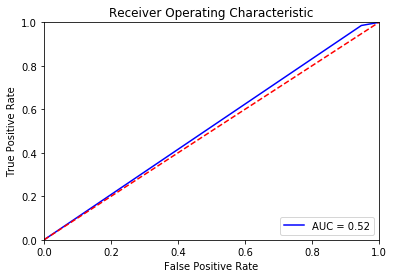

In [105]:
y_pred = model.predict(xts)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(yts, y_pred)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()
plt.show()

pd.crosstab(yts, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
from sklearn.metrics import classification_report

target_names = ['Bad Loan', 'Good Loan']
print(classification_report(yts, model.predict(xts), target_names=target_names))

import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(xts)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(yts, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()